In [605]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')



# Reading the data

In [606]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [607]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Check and fill null values

In [608]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Checking the unique values

In [609]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    print()

Unique values in column 'age': [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

Unique values in column 'sex': ['female' 'male']

Unique values in column 'bmi': [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49

 # Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors

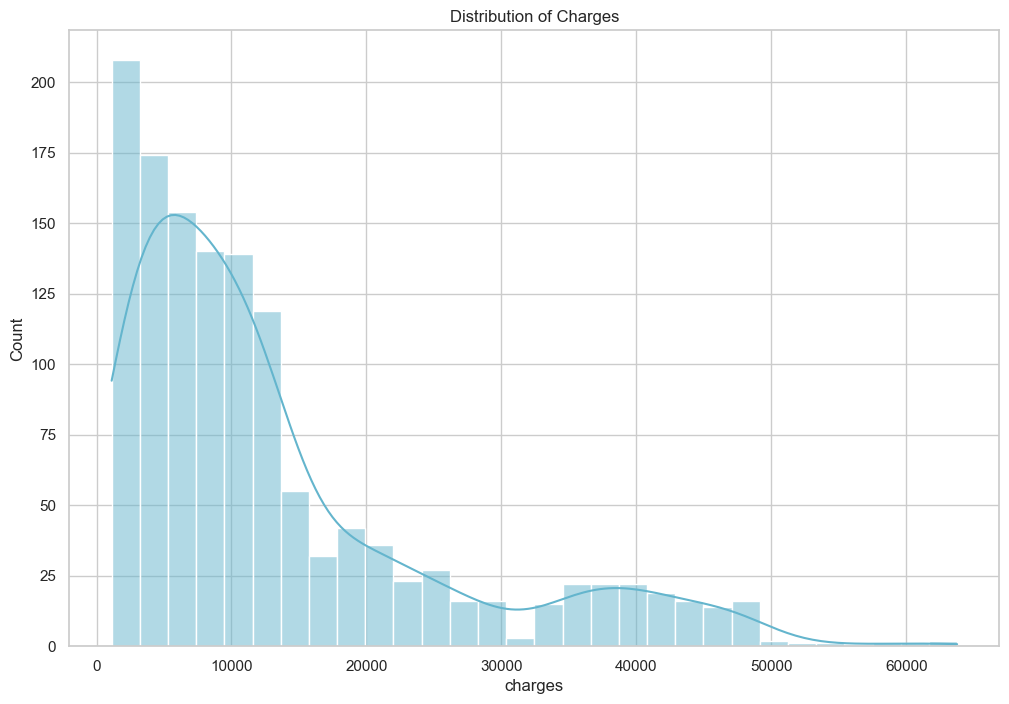

In [610]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(df['charges'], kde=True, color='c', ax=ax)
plt.title('Distribution of Charges')
plt.show()

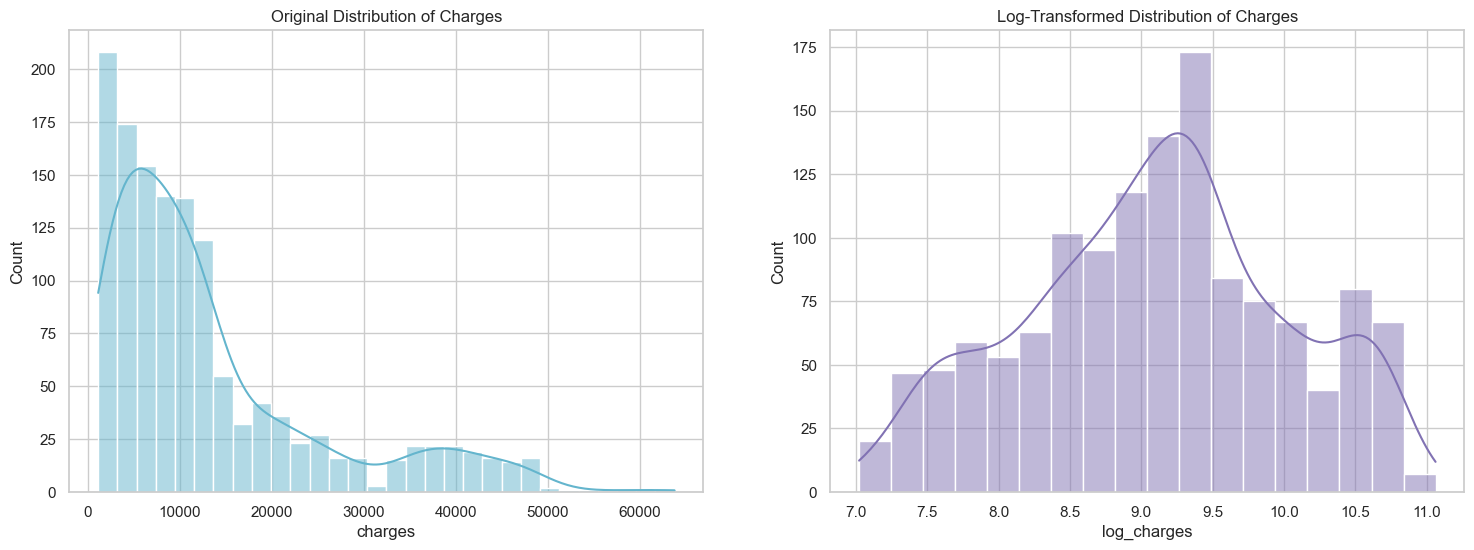

In [611]:
# Log transformation
df['log_charges'] = np.log(df['charges'])

# Plot the transformed data
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 2, figsize=(18, 6))

# Original data
sns.histplot(df['charges'], kde=True, color='c', ax=ax[0])
ax[0].set_title('Original Distribution of Charges')

# Log-transformed data
sns.histplot(df['log_charges'], kde=True, color='m', ax=ax[1])
ax[1].set_title('Log-Transformed Distribution of Charges')

plt.show()


In [612]:
df

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,7.604867


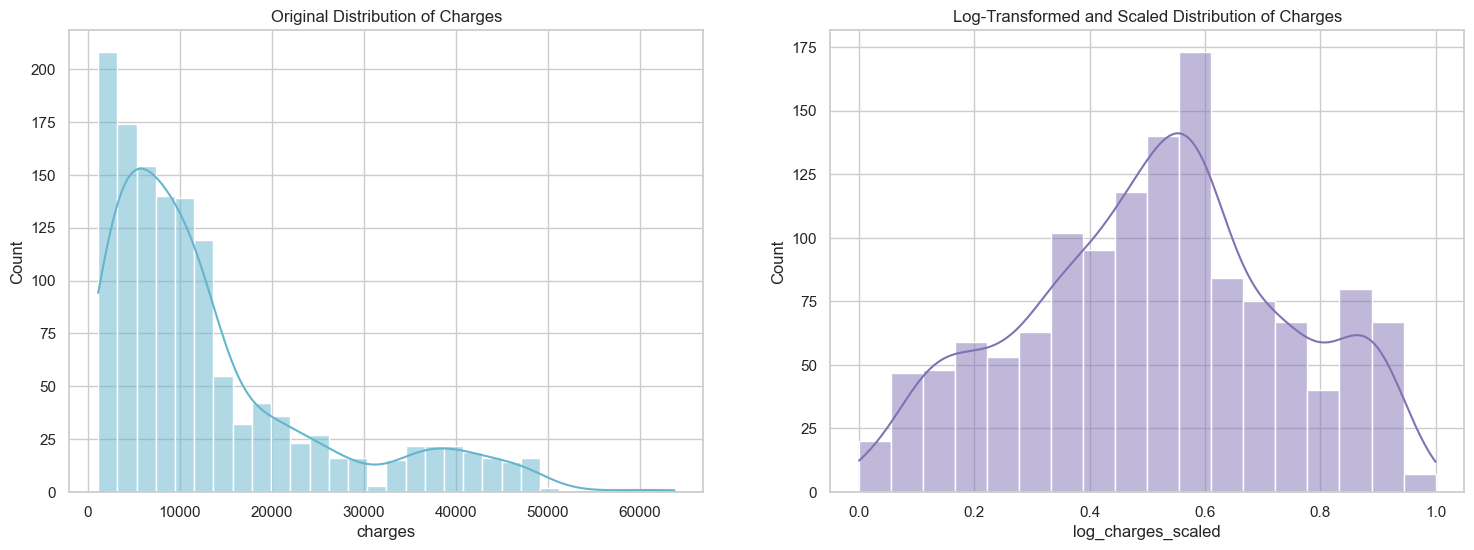

In [613]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Log transformation
df['log_charges'] = np.log(df['charges'])

# Min-max scaling
scaler = MinMaxScaler()
df['log_charges_scaled'] = scaler.fit_transform(df['log_charges'].values.reshape(-1, 1))

# Plot the transformed data
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 2, figsize=(18, 6))

# Original data
sns.histplot(df['charges'], kde=True, color='c', ax=ax[0])
ax[0].set_title('Original Distribution of Charges')

# Log-transformed and scaled data
sns.histplot(df['log_charges_scaled'], kde=True, color='m', ax=ax[1])
ax[1].set_title('Log-Transformed and Scaled Distribution of Charges')

plt.show()


In [614]:
df

,age,sex,bmi,children,smoker,region,charges,log_charges,log_charges_scaled
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,0.671096
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,0.106563
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,0.341011
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,0.736417
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,0.306275
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268661,0.555877
1334,18,female,31.920,0,no,northeast,2205.98080,7.698927,0.167357
1335,18,female,36.850,0,no,southeast,1629.83350,7.396233,0.092438
1336,21,female,25.800,0,no,southwest,2007.94500,7.604867,0.144077


In [615]:
df.drop(columns=['charges','log_charges'], inplace=True)
df


,age,sex,bmi,children,smoker,region,log_charges_scaled
0,19,female,27.900,0,yes,southwest,0.671096
1,18,male,33.770,1,no,southeast,0.106563
2,28,male,33.000,3,no,southeast,0.341011
3,33,male,22.705,0,no,northwest,0.736417
4,32,male,28.880,0,no,northwest,0.306275
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,0.555877
1334,18,female,31.920,0,no,northeast,0.167357
1335,18,female,36.850,0,no,southeast,0.092438
1336,21,female,25.800,0,no,southwest,0.144077


In [616]:
# Let's say you want to rename the column 'old_column_name' to 'new_column_name'
df.rename(columns={'log_charges_scaled': 'charges'}, inplace=True)
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,0.671096
1,18,male,33.770,1,no,southeast,0.106563
2,28,male,33.000,3,no,southeast,0.341011
3,33,male,22.705,0,no,northwest,0.736417
4,32,male,28.880,0,no,northwest,0.306275
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,0.555877
1334,18,female,31.920,0,no,northeast,0.167357
1335,18,female,36.850,0,no,southeast,0.092438
1336,21,female,25.800,0,no,southwest,0.144077


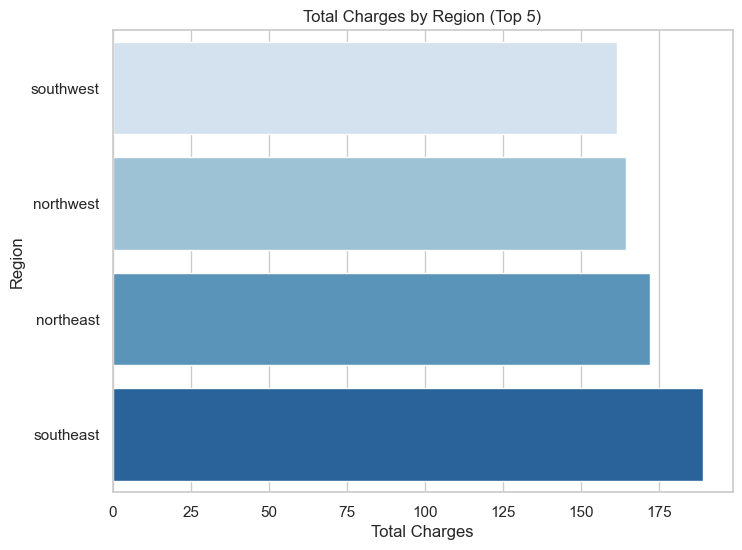

In [617]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')
ax.set_title('Total Charges by Region (Top 5)')
ax.set_xlabel('Total Charges')
ax.set_ylabel('Region')
plt.show()


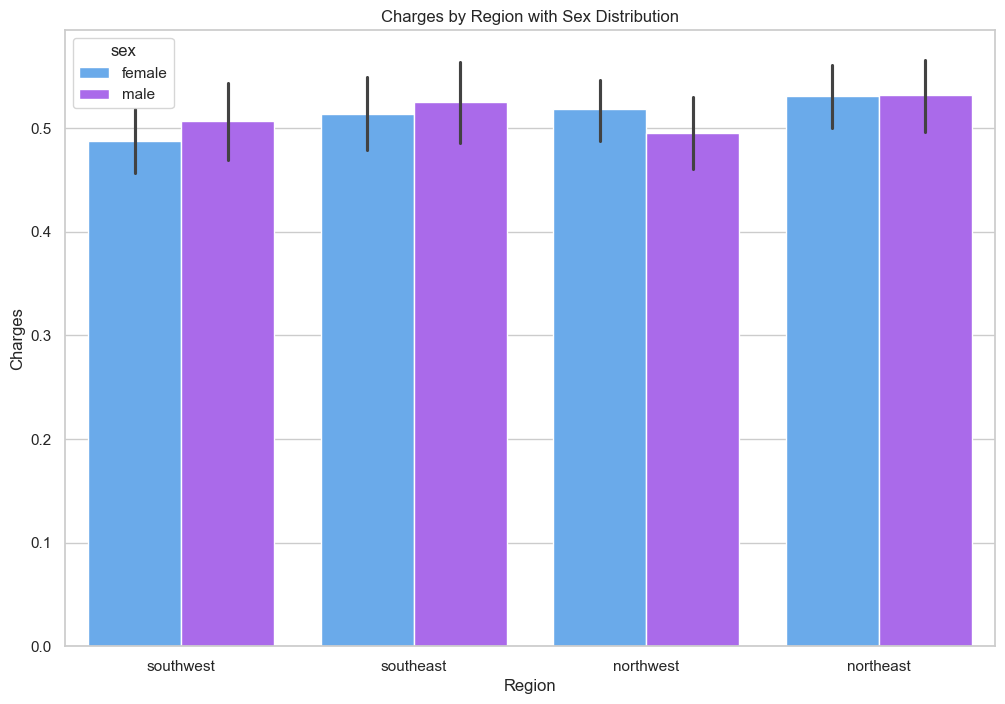

In [618]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool', ax=ax)
ax.set_title('Charges by Region with Sex Distribution')
ax.set_xlabel('Region')
ax.set_ylabel('Charges')
plt.show()

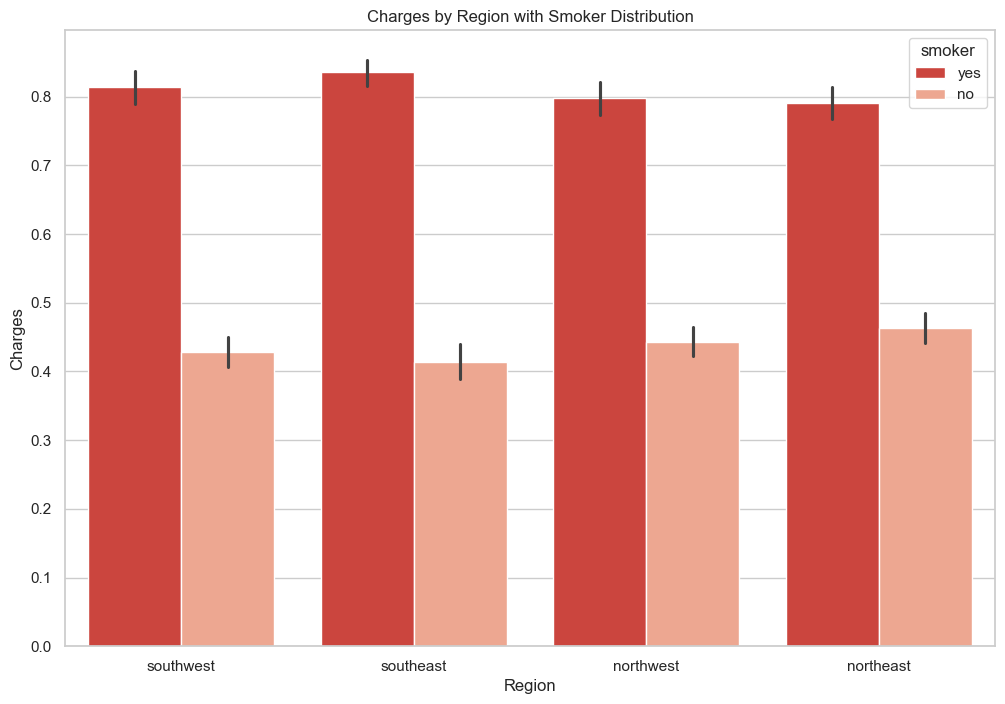

In [619]:
f, ax = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds_r', ax=ax)
ax.set_title('Charges by Region with Smoker Distribution')
ax.set_xlabel('Region')
ax.set_ylabel('Charges')
plt.show()

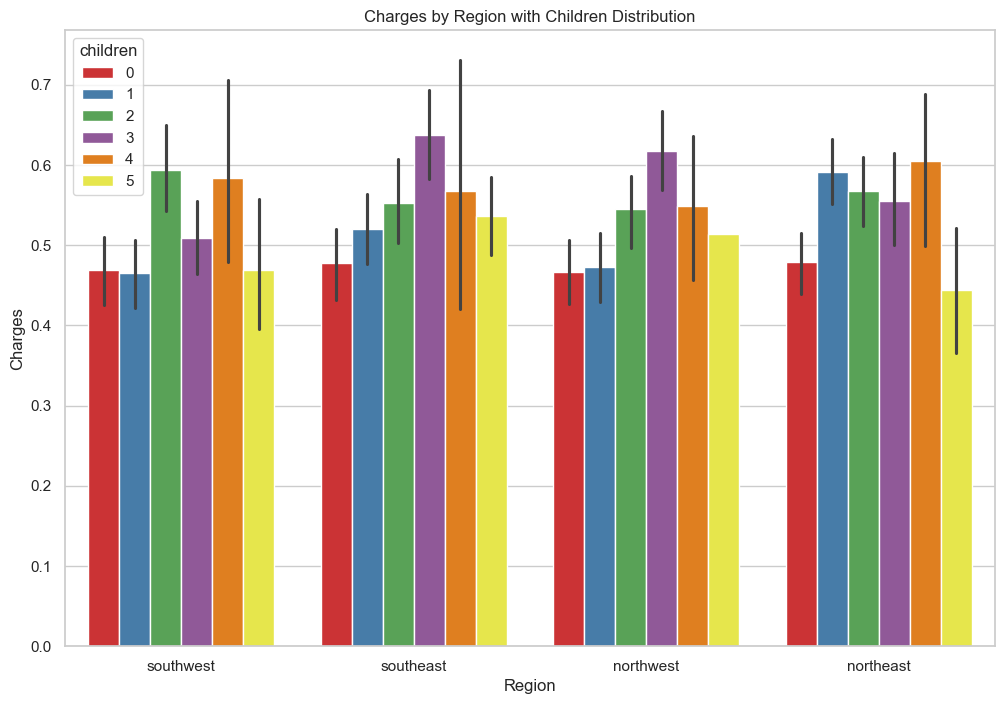

In [620]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1', ax=ax)
ax.set_title('Charges by Region with Children Distribution')
ax.set_xlabel('Region')
ax.set_ylabel('Charges')
plt.show()

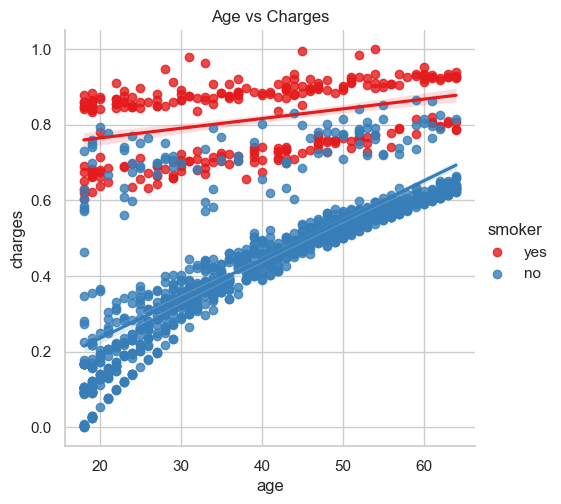

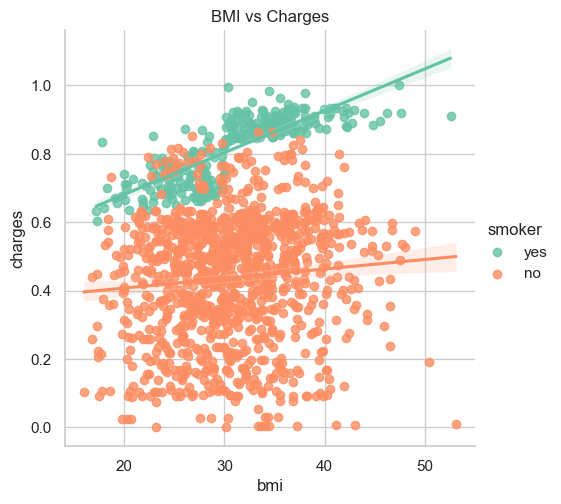

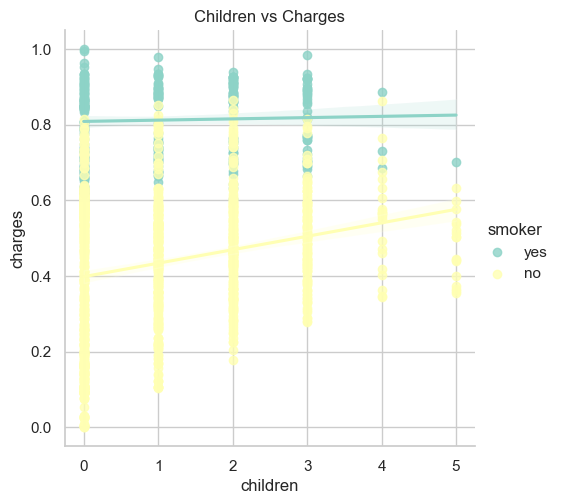

In [621]:
import seaborn as sns

# Scatter plot with linear regression line for 'age' vs. 'charges'
sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='Set1')
plt.title('Age vs Charges')
plt.show()

# Scatter plot with linear regression line for 'bmi' vs. 'charges'
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set2')
plt.title('BMI vs Charges')
plt.show()

# Scatter plot with linear regression line for 'children' vs. 'charges'
sns.lmplot(x='children', y='charges', data=df, hue='smoker', palette='Set3')
plt.title('Children vs Charges')
plt.show()


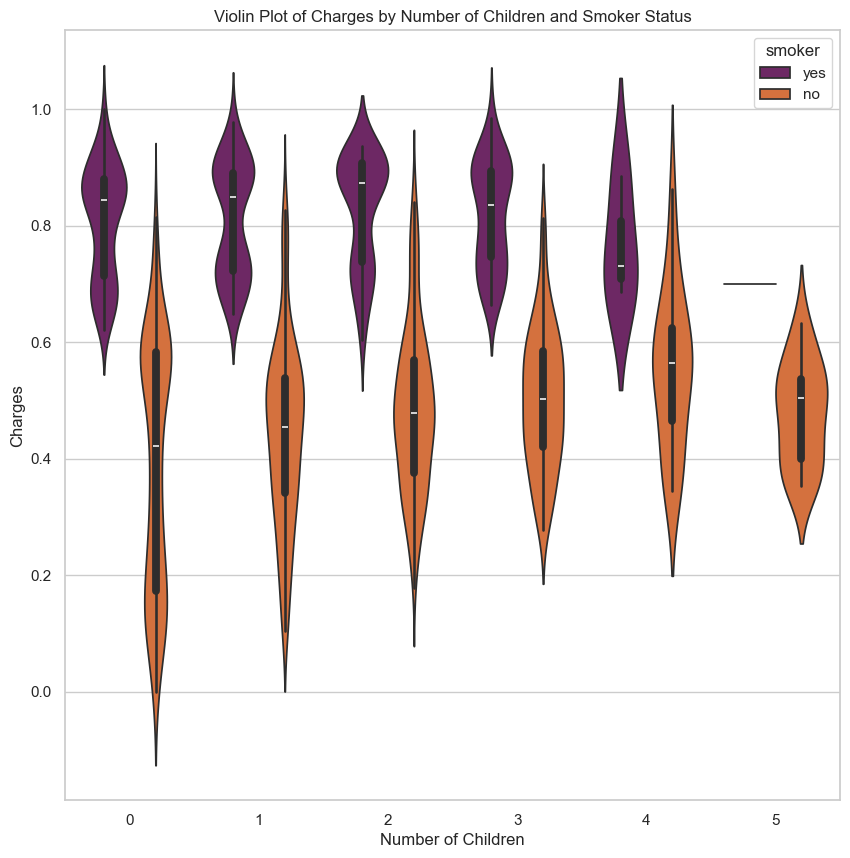

In [622]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.violinplot(x='children', y='charges', data=df, orient='v', hue='smoker', palette='inferno')
plt.title('Violin Plot of Charges by Number of Children and Smoker Status')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


# Outlier handling for ages and bmi

In [623]:
# AGE

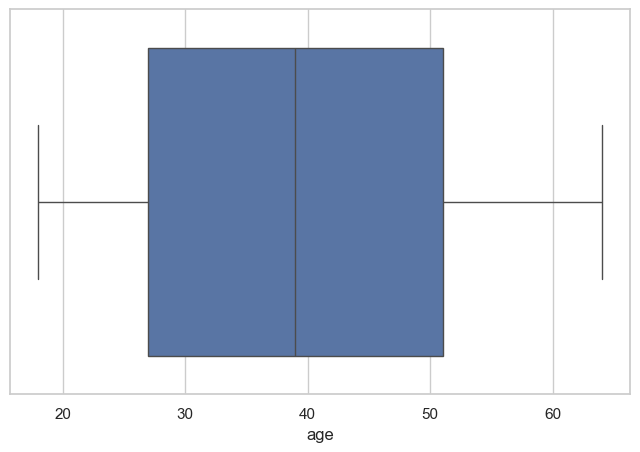

In [624]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df.age)
plt.show()

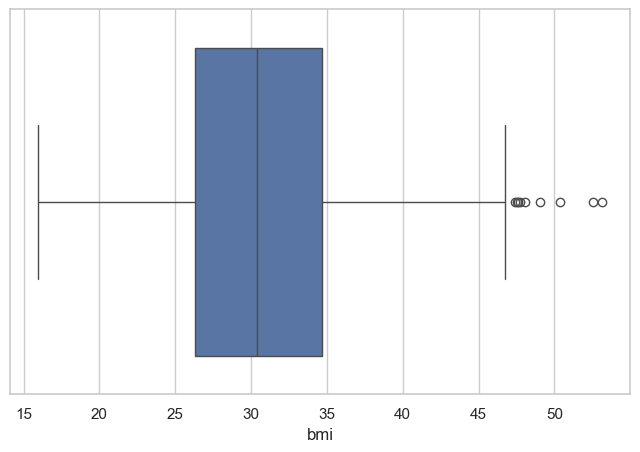

In [625]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df.bmi)
plt.show()

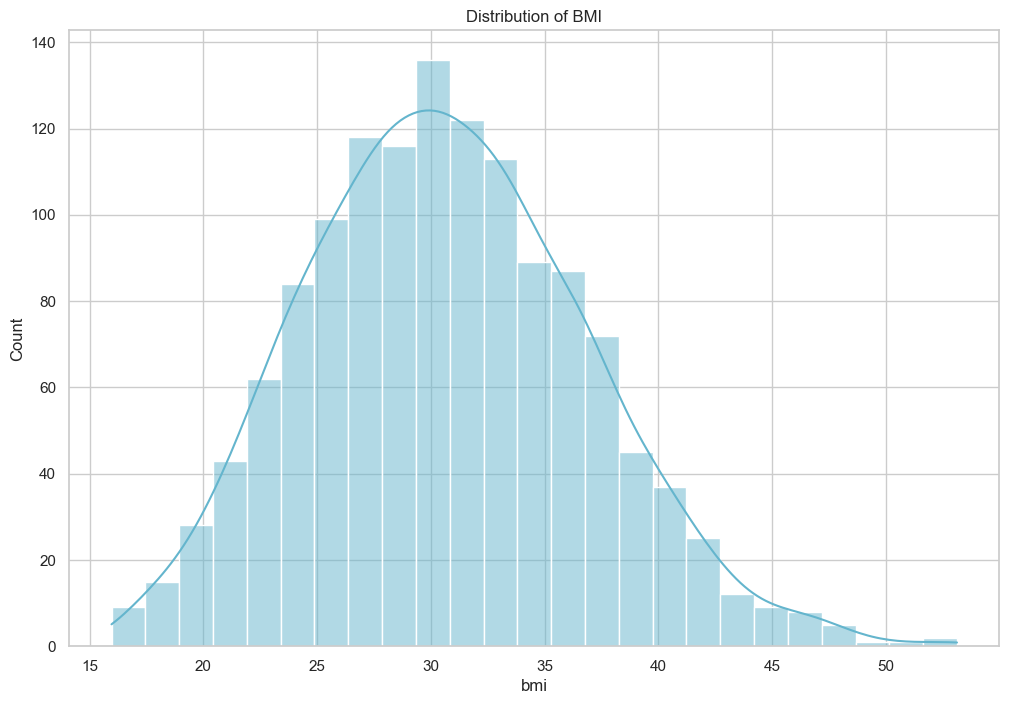

In [626]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(df['bmi'], kde=True, color='c', ax=ax)
plt.title('Distribution of BMI')
plt.show()

In [627]:
# We can replace the outliers using mean of the BMI score. BEcase this is like Normal distribution

In [628]:
lower_limit = df['bmi'].quantile(0.01)
upper_limit = df['bmi'].quantile(0.99)
lower_limit, upper_limit

(17.895149999999997, 46.40789999999996)

In [629]:
# finding mean of the bmi score and replace it with outliers

In [630]:
mean_bmi = df.loc[df['bmi']<upper_limit, "bmi"].mean()
df.loc[df['bmi']>upper_limit, "bmi"] = mean_bmi

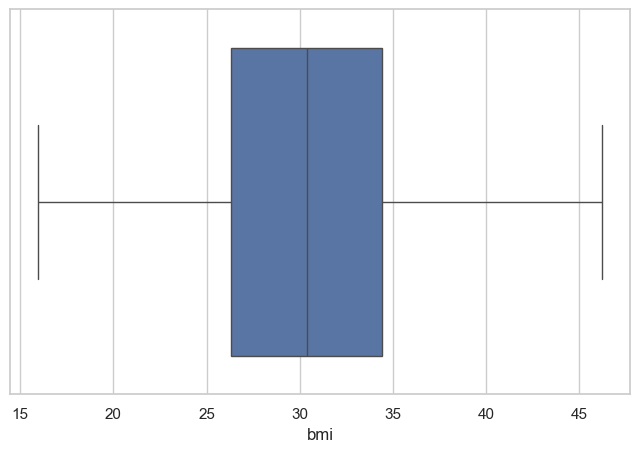

In [631]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df.bmi)
plt.show()

In [632]:
# Convert object type columns to categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')

# Check data types after conversion
print(df.dtypes)


age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [633]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label = LabelEncoder()

# Encode 'sex' column
df['sex'] = label.fit_transform(df['sex'])

# Encode 'smoker' column
df['smoker'] = label.fit_transform(df['smoker'])

# Encode 'region' column
df['region'] = label.fit_transform(df['region'])

# Check data types after encoding
print(df.dtypes)


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object


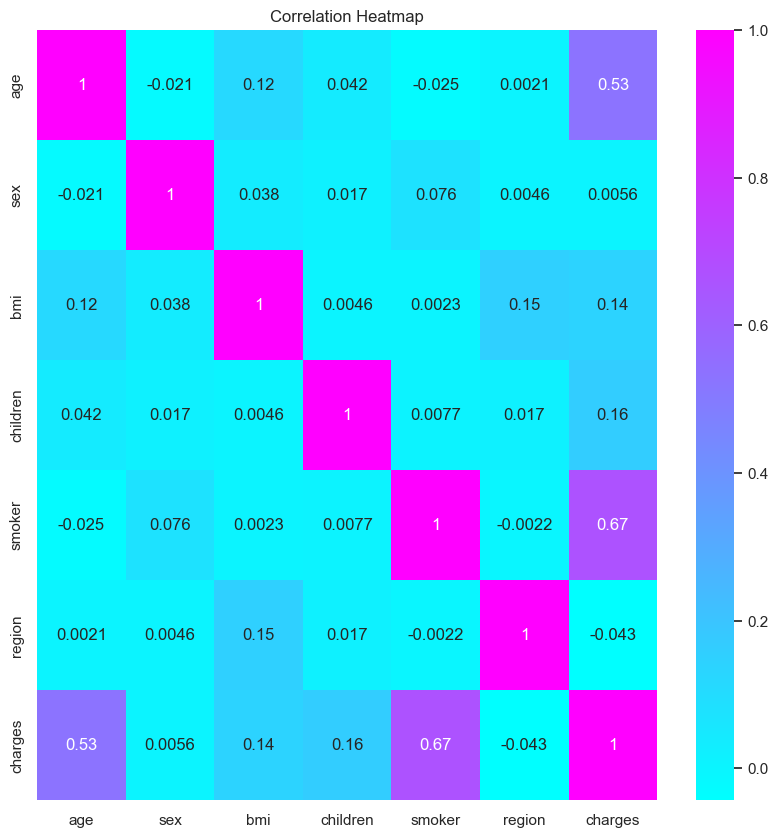

In [634]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

In [635]:
x = df.drop(columns=['charges'])
y = df['charges']

In [636]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [637]:
y

0       0.671096
1       0.106563
2       0.341011
3       0.736417
4       0.306275
          ...   
1333    0.555877
1334    0.167357
1335    0.092438
1336    0.144077
1337    0.806170
Name: charges, Length: 1338, dtype: float64

In [638]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
len(x_train), len(x_test), len(y_train), len(y_test)


(1070, 268, 1070, 268)

# Training the model

In [639]:
lr = LinearRegression()


In [640]:
lr.fit(x_train, y_train)

LinearRegression()

In [641]:
lr.score(x_train,y_train)

0.7816770225077176